In [1]:
# Importing libraries
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
import glob
# Make a filepath query and use glob.glob to get COMPLETE filepaths
q = 'Data/final*.csv.gz'
file_list = sorted(glob.glob(q))
file_list

['Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz',
 'Data/final_tmdb_data_2020.csv.gz']

In [4]:
# Concatenating the data into one df
df = pd.concat([pd.read_csv(f,lineterminator='\n') for f in file_list])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,tt9904004,0.0,NaN,NaN,0.0,[],NaN,678495.0,en,Your Iron Lady,A year in the life of Teresa: an immigrant mot...,0.600,/sdi327ECZEg4yIhjhqiqcFPGWOZ.jpg,[],[],2020-01-23,0.0,92.0,[],Released,NaN,Your Iron Lady,0.0,3.7,3.0,NaN
3714,tt9904802,0.0,/tVa0v0iX7ksdfHtYdTdJglZWy5N.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}]",https://gooddeedentertainment.com/enemy-lines/,679796.0,en,Enemy Lines,"In the frozen, war torn landscape of occupied ...",7.824,/vG8qBkByy9naORB6zahcntIC2N.jpg,"[{'id': 49937, 'logo_path': '/j14jwTsJj6ok9IkU...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2020-04-24,0.0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Courage has no border.,Enemy Lines,0.0,5.3,24.0,NaN
3715,tt9911196,0.0,/f1WhKsQZEPjOHQ4wTmlq75z0RF6.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,591915.0,nl,De Beentjes van Sint-Hildegard,Jan has been married to Gedda for 35 years. Ge...,2.396,/qZNlF6i3MOvwhRV8SDfp5M40hVx.jpg,"[{'id': 60652, 'logo_path': '/pNlPbnwBkKgZsc2y...","[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2020-02-10,0.0,103.0,"[{'english_name': 'Dutch', 'iso_639_1': 'nl', ...",Released,NaN,The Marriage Escape,0.0,8.0,23.0,NaN
3716,tt9916190,0.0,/1AQfc9DmssPhCIiU0ukjWoaN2V.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,633490.0,en,Safeguard,When a Japanese restaurant is extorted by the ...,2.845,/wblwB3UGVkEvT0dJebtocGCTLXI.jpg,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2020-09-07,0.0,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Safeguard,0.0,6.5,2.0,NaN


In [6]:
# Removing ids that are 0
df = df.loc[ df['imdb_id']!='0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
5,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,119.168,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,tt9904004,0.0,NaN,NaN,0.0,[],NaN,678495.0,en,Your Iron Lady,A year in the life of Teresa: an immigrant mot...,0.600,/sdi327ECZEg4yIhjhqiqcFPGWOZ.jpg,[],[],2020-01-23,0.0,92.0,[],Released,NaN,Your Iron Lady,0.0,3.7,3.0,NaN
3714,tt9904802,0.0,/tVa0v0iX7ksdfHtYdTdJglZWy5N.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}]",https://gooddeedentertainment.com/enemy-lines/,679796.0,en,Enemy Lines,"In the frozen, war torn landscape of occupied ...",7.824,/vG8qBkByy9naORB6zahcntIC2N.jpg,"[{'id': 49937, 'logo_path': '/j14jwTsJj6ok9IkU...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2020-04-24,0.0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Courage has no border.,Enemy Lines,0.0,5.3,24.0,NaN
3715,tt9911196,0.0,/f1WhKsQZEPjOHQ4wTmlq75z0RF6.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,591915.0,nl,De Beentjes van Sint-Hildegard,Jan has been married to Gedda for 35 years. Ge...,2.396,/qZNlF6i3MOvwhRV8SDfp5M40hVx.jpg,"[{'id': 60652, 'logo_path': '/pNlPbnwBkKgZsc2y...","[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2020-02-10,0.0,103.0,"[{'english_name': 'Dutch', 'iso_639_1': 'nl', ...",Released,NaN,The Marriage Escape,0.0,8.0,23.0,NaN
3716,tt9916190,0.0,/1AQfc9DmssPhCIiU0ukjWoaN2V.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,633490.0,en,Safeguard,When a Japanese restaurant is extorted by the ...,2.845,/wblwB3UGVkEvT0dJebtocGCTLXI.jpg,[],"[{'iso_3166_1': 'GB', 'n

## Preprocessing the dataframe

In [7]:
# Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns = drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
1,tt0312305,0.0,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN
2,tt0326965,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,0.0,[],0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN
4,tt0393049,0.0,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN
5,tt0398286,0.0,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,tt9904004,0.0,NaN,0.0,[],0.600,2020-01-23,0.0,92.0,Your Iron Lady,3.7,3.0,NaN
3714,tt9904802,0.0,NaN,0.0,"[{'id': 10752, 'name': 'War'}]",7.824,2020-04-24,0.0,92.0,Enemy Lines,5.3,24.0,NaN
3715,tt9911196,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2.396,2020-02-10,0.0,103.0,The Marriage Escape,8.0,23.0,NaN
3716,tt9916190,0.0,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2.845,2020-09-07,0.0,0.0,Safeguard,6.5,2.0,NaN


In [8]:
# Looking at how many movies belong to a collection vs don't
# Will use for later on in hypothesis testing
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    38175
True      2384
Name: belongs_to_collection, dtype: int64

In [9]:
# Defining a function to get just the genre names
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [10]:
# Using the function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
1,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,Family
1,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,Animation
1,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,Science Fiction
2,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,Thriller
2,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,tt9916190,0.0,False,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2.845,2020-09-07,0.0,0.0,Safeguard,6.5,2.0,NaN,Action
3716,tt9916190,0.0,False,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2.845,2020-09-07,0.0,0.0,Safeguard,6.5,2.0,NaN,Adventure
3716,tt9916190,0.0,False,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2.845,2020-09-07,0.0,0.0,Safeguard,6.5,2.0,NaN,Thriller
3717,tt9916362,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",10.049,2020-10-02,0.0,92.0,Coven,6.7,214.0,NR,Drama


In [11]:
# Saving unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [12]:
# Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
1,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0331312,0.0,False,0.0,[],0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
5,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,tt9904004,0.0,False,0.0,[],0.600,2020-01-23,0.0,92.0,Your Iron Lady,3.7,3.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3714,tt9904802,0.0,False,0.0,"[{'id': 10752, 'name': 'War'}]",7.824,2020-04-24,0.0,92.0,Enemy Lines,5.3,24.0,NaN,[War],False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3715,tt9911196,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2.396,2020-02-10,0.0,103.0,The Marriage Escape,8.0,23.0,NaN,"[Comedy, Drama]",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
3716,tt9916190,0.0,False,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2.845,2020-09-07,0.0,0.0,Safeguard,6.5,2.0,NaN,"[Action, Adventure, Thriller]",False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [13]:
## Drop original genre cols
df  = df.drop(columns=['genres','genres_list'])
df

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
1,tt0312305,0.0,False,0.0,2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0326965,0.0,False,0.0,6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0331312,0.0,False,0.0,0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0393049,0.0,False,300000.0,2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
5,tt0398286,0.0,False,260000000.0,119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,tt9904004,0.0,False,0.0,0.600,2020-01-23,0.0,92.0,Your Iron Lady,3.7,3.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3714,tt9904802,0.0,False,0.0,7.824,2020-04-24,0.0,92.0,Enemy Lines,5.3,24.0,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3715,tt9911196,0.0,False,0.0,2.396,2020-02-10,0.0,103.0,The Marriage Escape,8.0,23.0,NaN,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
3716,tt9916190,0.0,False,0.0,2.845,2020-09-07,0.0,0.0,Safeguard,6.5,2.0,NaN,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [14]:
# Checking Certification values counts
df['certification'].value_counts(dropna=False)

NaN        31724
R           3307
NR          2404
PG-13       1859
PG           860
G            287
NC-17        111
Unrated        4
R              1
PG-13          1
10             1
Name: certification, dtype: int64

In [15]:
# Fixing extra space certs
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna=False)

NaN        31724
R           3308
NR          2404
PG-13       1860
PG           860
G            287
NC-17        111
Unrated        4
10             1
Name: certification, dtype: int64

In [16]:
# fixing certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      31725
R         3308
NR        2408
PG-13     1860
PG         860
G          287
NC-17      111
Name: certification, dtype: int64

In [17]:
# Converting release date to separate features
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
1,tt0312305,0.0,False,0.0,2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
2,tt0326965,0.0,False,0.0,6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
3,tt0331312,0.0,False,0.0,0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
4,tt0393049,0.0,False,300000.0,2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
5,tt0398286,0.0,False,260000000.0,119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,tt9904004,0.0,False,0.0,0.600,2020-01-23,0.0,92.0,Your Iron Lady,3.7,3.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2020.0,1.0,23.0
3714,tt9904802,0.0,False,0.0,7.824,2020-04-24,0.0,92.0,Enemy Lines,5.3,24.0,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,2020.0,4.0,24.0
3715,tt9911196,0.0,False,0.0,2.396,2020-02-10,0.0,103.0,The Marriage Escape,8.0,23.0,NaN,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,2020.0,2.0,10.0
3716,tt9916190,0.0,False,0.0,2.845,2020-09-07,0.0,0.0,Safeguard,6.5,2.0,NaN,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,2020.0,9.0,7.0


In [18]:
# Drop release date
df = df.drop(columns=['release_date'])

### Q1: Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
1. State the Hypothesis & Null Hypothesis
    - (Null Hypothesis): The MPAA rating of a movie has no affect on the revenue.
    - (Alternative Hypothesis): MPAA ratings have a significant affect on how much revenue a movie generates


2. Determine the correct test to perform.
    - Type of Data? numeric
    - How many groups/samples? four
    - Therefore, which test is appropriate? ANOVA

In [44]:
# ANOVA TESTINg

import statsmodels.formula.api as smf
import statsmodels.api as sm
f = "revenue ~ C(certification)"

In [45]:
# Instantiating the model and fitting it
model = smf.ols(f, df).fit()

In [46]:
res = sm.stats.anova_lm(model,typ=1)
res

,df,sum_sq,mean_sq,F,PR(>F)
C(certification),5.0,8.051196e+18,1.610239e+18,106.836302,7.222246e-110
Residual,8828.0,1.330558e+20,1.507202e+16,NaN,NaN


#### We can find the p value as Pr(>F). Based on this we can see that it is way less than .05. Therefore we can reject the null hypothesis and conclude that the certification of a movie has an impact on how much revenue the movie makes.

<AxesSubplot: xlabel='certification', ylabel='revenue'>

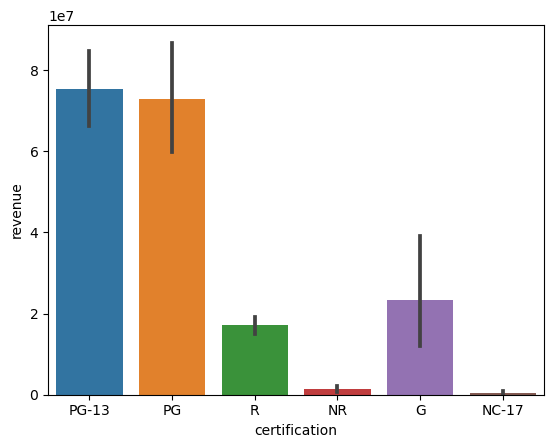

In [50]:
# Visual Data to see if this is true
sns.barplot(data=df, x='certification',y='revenue')

#### From the visualization we can see that movies with certification ratings of PG-13 and PG generated the most out of the group.

### Q2: Do movies released in 2020 earn more revenue than movies released in 2018?
1. State the Hypothesis & Null Hypothesis
    - (Null Hypothesis): Movies in 2020 earned the same revenue as movies in 2018.
    - (Alternative Hypothesis): Movies in 2020 earned significantly more than movies in 2018.


2. Determine the correct test to perform.
    - Type of Data? numeric
    - How many groups/samples? two
    - Therefore, which test is appropriate? 2-sample t-test

In [ ]:
## Separate the column of interest based on the groups
male_df = df.loc[ df['has_female']==False, ['funded_amount','has_female']]
female_df = df.loc[ df['has_female']==True,['funded_amount','has_female']]

print(f"There are {len(female_df)} campaigns that had females on the team." )
print(f"There are {len(male_df)} campaigns that only had males on the team." )